https://app.outscraper.com/googleMaps?c=hotel&dd=true&gl=BR&hl=pt-BR&limit=499&z=true



# Reunindo dados raspados via serviço externo (gratuíto)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import glob

files = glob.glob("scraper/input/outscraper/*.xlsx")

files

['scraper/input/outscraper\\Outscraper-20240508122337bd64_resort_hotel_+2.xlsx',
 'scraper/input/outscraper\\Outscraper-20240508122753d29f (1).xlsx',
 'scraper/input/outscraper\\Outscraper-20240508122753d29f.xlsx',
 'scraper/input/outscraper\\Outscraper-20240508125928c481_hotel.xlsx',
 'scraper/input/outscraper\\Outscraper-20240508131552fbbe.xlsx']

In [4]:
dfs = []
for file in files:
    df = pd.read_excel(file)
    dfs.append(df)

In [5]:
df = pd.concat(dfs)
df.shape

(2003, 82)

# Filtrando

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
df.sample().iloc[0]

query                                                hotel, 57525-000, Ouro Branco, Alagoas , BR
name                                                                           Pousada São Jorge
name_for_emails                                                                Pousada São Jorge
site                                                                                         NaN
site.company_insights.address                                                                NaN
site.company_insights.city                                                                   NaN
site.company_insights.country                                                                NaN
site.company_insights.description                                                            NaN
site.company_insights.employees                                                              NaN
site.company_insights.facebook_company_page                                                  NaN
site.company_insights.is_publi

In [8]:
for c in df.columns:
    print("\n", c)
    print(df[c].value_counts().iloc[:5])



 query
hotel, 27460-000, Rio Claro, Rio de Janeiro , BR        182
hotel, 55360-000, Caetés, Pernambuco , BR               139
hotel, 13910-000, Monte Alegre do Sul, Sao Paulo, BR    130
hotel, 53900-000, Ilha de Itamaracá, Pernambuco , BR    112
hotel, 12980-000, Joanópolis, Sao Paulo, BR             109
Name: query, dtype: int64

 name
Hotel Real         6
Hotel Beira Rio    5
Domo do Matto      4
Pousada            4
Hotel Mundial      4
Name: name, dtype: int64

 name_for_emails
Hotel Real                    6
Hotel Imperial                5
Hotel Beira Rio               5
Pousada Por Do Sol            4
Pousada Recanto Do Sossego    4
Name: name_for_emails, dtype: int64

 site
https://all.accor.com/lien_externe.svlt?goto=fiche_hotel    10
http://www.booking.com/                                      4
http://www.vitoriadaserra.com.br/                            4
http://www.villaflor.com.br/                                 4
https://hotelparaiso.wordpress.com/hotel-paraiso-1/     

In [9]:
# Removendo lugares fechados e sem reviews
df_filter = df.drop_duplicates("place_id").query("business_status == 'OPERATIONAL' & reviews >= 5")
df_filter.shape

(1386, 82)

In [10]:
# Removendo lugares com o mesmo nome, mantendo aqueles com maior número de avaliações
df_filter = df_filter.sort_values("reviews", ascending=False).drop_duplicates("name")
df_filter.shape

(1356, 82)

In [11]:
df[["category", "subtypes"]].value_counts(dropna=False)

category                          subtypes                                                                                                                                                                                                                  
hotéis                            Hotel                                                                                                                                                                                                                         925
Pousada                           Pousada                                                                                                                                                                                                                       298
Cama e café                       Cama e café                                                                                                                                                                                      

In [12]:
cols = [
    "name",
    "reviews",
    "rating",

    "city",
    "state",
    "latitude",
    "longitude",
    # "full_address",

    "range",
    # "type",
    "subtypes",
    "category",

    # "reviews_per_score_1",
    # "reviews_per_score_2",
    # "reviews_per_score_3",
    # "reviews_per_score_4",
    # "reviews_per_score_5",
    # "about",

    # "owner_title",

    "business_status",
    "google_id",
    "place_id",
]

In [13]:
df_filter[cols]

,name,reviews,rating,city,state,latitude,longitude,range,subtypes,category,business_status,google_id,place_id
359,Wyndham Olimpia Royal Hotel,12835.0,4.5,Olímpia,São Paulo,-20.717466,-48.917720,4 estrelas,"Hotel, Pousada",hotéis,OPERATIONAL,0x94bc6fa8fe446ec9:0x5ccb78373a2d5e26,ChIJyW5E_qhvvJQRJl4tOjd4y1w
73,Hotel Villa Lobos Spa Romantik,8762.0,4.8,Extrema,Minas Gerais,-22.843295,-46.329954,4 estrelas,"Wellness hotel, Restaurante, Spa",hotéis,OPERATIONAL,0x94ceadae1ef20e39:0x4b6fe14511fcf394,ChIJOQ7yHq6tzpQRlPP8EUXhb0s
358,Thermas de Olimpia Resorts By Mercure,7487.0,4.0,Olímpia,São Paulo,-20.721898,-48.916238,4 estrelas,Hotel,hotéis,OPERATIONAL,0x94bc6fad6183b5eb:0x9eb505faccb668d4,ChIJ67WDYa1vvJQR1Gi2zPoFtZ4
453,Hotel Fazenda Vale do Sol,4667.0,4.6,Serra Negra,SP,-22.604534,-46.694669,NaN,Hotel,hotéis,OPERATIONAL,0x94c9186bd01db787:0x18ca5e125783c845,ChIJh7cd0GsYyZQRRciDVxJeyhg
414,Hotel Porto Real Resort,4570.0,4.5,Mangaratiba,Rio de Janeiro,-23.035686,-44.149237,4 estrelas,"Hotel Resort, Hotel",hotéis,OPERATIONAL,0x9c439790749def:0x61cb3cde96c15a95,ChIJ7510kJdDnAARlVrBlt48y2E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Chalé Estilo Mineiro,5.0,4.0,Camanducaia,Minas Gerais,-22.809241,-46.142797,NaN,Chalé,Chalé,OPERATIONAL,0x94cc0584daf5060b:0x7e8f27b35af0c959,ChIJCwb12oQFzJQRWcnwWrMnj34
164,Pousada Xapuri,5.0,4.8,Muriaé,Minas Gerais,-20.878293,-42.485069,NaN,Hotel,hotéis,OPERATIONAL,0xbcadee2e030269:0x5574e8a06b9dab9e,ChIJaQIDLu6tvAARnquda6DodFU
163,Pousada São João,5.0,3.8,São João,Pernambuco,-8.873199,-36.365864,NaN,Hotel,hotéis,OPERATIONAL,0x7076d5247bcb143:0x8b73d076f74af483,ChIJQ7G8R1JtBwcRg_RK93bQc4s
246,Guest house Dharma,5.0,5.0,São José do Rio Preto,São Paulo,-20.815689,-49.375013,NaN,Hotel,hotéis,OPERATIONAL,0x94bdadf4faee9cbd:0x9cdb8dd14d639670,ChIJvZzu-vStvZQRcJZjTdGN25w


In [14]:
df_input = df_filter.copy()

In [15]:
df_input.range.str.replace(" estrelas|[$]*", "", regex=True).value_counts(dropna=False)

NaN    1006
3       196
2       104
4        34
          6
5         5
1         5
Name: range, dtype: int64

In [16]:
df_input["stars"] = df_input.range.str.replace(" estrelas|[$]*", "", regex=True).replace("","0").fillna("0").astype(float)

In [17]:
df_input["done"] = 0
df_input["n_reviews"] = -1
df_input["n_reviews_max"] = df_input["reviews"].astype("int64")
df_input["sort_by"] = "newest"
df_input["hl"] = "pt-br"
df_input["url"] = df_input["location_link"]
df_input["dt_selection"] = 2025

In [18]:
df_input.columns

Index(['query', 'name', 'name_for_emails', 'site',
       'site.company_insights.address', 'site.company_insights.city',
       'site.company_insights.country', 'site.company_insights.description',
       'site.company_insights.employees',
       'site.company_insights.facebook_company_page',
       'site.company_insights.is_public',
       'site.company_insights.linkedin_company_page',
       'site.company_insights.name', 'site.company_insights.phone',
       'site.company_insights.revenue', 'site.company_insights.state',
       'site.company_insights.timezone',
       'site.company_insights.twitter_handle', 'site.company_insights.zip',
       'subtypes', 'category', 'type', 'phone', 'full_address', 'borough',
       'street', 'city', 'postal_code', 'state', 'us_state', 'country',
       'country_code', 'latitude', 'longitude', 'h3', 'time_zone', 'plus_code',
       'area_service', 'rating', 'reviews', 'reviews_link', 'reviews_tags',
       'reviews_per_score', 'reviews_per_score_1', 

In [19]:
df_geo = pd.read_csv("analysis/artifacts/de_para_estados.csv")
df_geo

,sigla,estado,capital,regiao,region
0,AC,ACRE,RIO BRANCO,NORTE,NORTH
1,PA,PARÁ,BELÉM,NORTE,NORTH
2,RO,RONDÔNIA,PORTO VELHO,NORTE,NORTH
3,RR,RORAIMA,BOA VISTA,NORTE,NORTH
4,TO,TOCANTINS,PALMAS,NORTE,NORTH
5,MA,MARANHÃO,SÃO LUIZ,NORDESTE,NORTHEAST
6,PB,PARAÍBA,JOÃO PESSOA,NORDESTE,NORTHEAST
7,PE,PERNAMBUCO,RECIFE,NORDESTE,NORTHEAST
8,PI,PIAUÍ,TEREZINA,NORDESTE,NORTHEAST
9,RN,RIO GRANDE DO NORTE,NATAL,NORDESTE,NORTHEAST


In [20]:
df_input.shape

(1356, 90)

In [21]:
df_input = df_input.drop(columns=["sigla", "estado", "capital", "regiao"], errors="ignore")
df_input["estado"] = df_input.state.str.upper()
df_input = df_input.merge(
    df_geo[["estado","sigla"]],
    on="estado",
    how="left",
)
f_ufs = df_input.state.str.len()==2
df_input.loc[f_ufs, "sigla"] = df_input.loc[f_ufs, "state"]
df_input = df_input.drop(columns=["estado"], errors="ignore")

In [22]:
df_input = df_input.merge(
    df_geo[["sigla", "estado", "capital", "regiao"]],
    on="sigla",
    how="left",
)

In [23]:
df_input[["sigla","state","regiao"]].value_counts(dropna=False).sort_index()

sigla  state                regiao      
AC     Acre                 NORTE             2
AL     AL                   NORDESTE          3
       Alagoas              NORDESTE          8
AM     Amazonas             NORTE             4
AP     Amapá                NORTE             4
BA     BA                   NORDESTE         16
       Bahia                NORDESTE         91
CE     CE                   NORDESTE          4
       Ceará                NORDESTE         18
ES     ES                   SUDESTE           1
       Espírito Santo       SUDESTE           7
GO     GO                   CENTRO-OESTE      1
       Goiás                CENTRO-OESTE     18
MA     MA                   NORDESTE          3
       Maranhão             NORDESTE         17
MG     MG                   SUDESTE          31
       Minas Gerais         SUDESTE         117
MS     Mato Grosso do Sul   CENTRO-OESTE      1
MT     MT                   CENTRO-OESTE      3
       Mato Grosso          CENTRO-OESTE     14

In [24]:
cols_input = ["done","name","n_reviews","sort_by","hl","url","google_id","n_reviews_max","dt_selection",
              "stars","city", "sigla", "estado", "capital", "regiao", "category", "subtypes"]
# df_input = df_input[cols_input].sort_values("n_reviews_max", ascending=True)

In [25]:
# df_input.to_csv("scraper/input/hotels_24_05_08.csv", index=False)

# Lista de hoteis 2024

In [26]:
import re

def parse_url(url):
    return re.findall("0[xX][0-9a-fA-F]+:0[xX][0-9a-fA-F]+", url)[0]

In [27]:
df_old = pd.read_csv("scraper/input/hotels_23_01_19.csv")

In [28]:
df_old.columns

Index(['done', 'name', 'sort_by', 'hl', 'n_reviews', 'url', 'use', 'name_raw',
       'n_reviews_max', 'state', 'region', 'overall_rating', 'stars'],
      dtype='object')

In [29]:
df_old = df_old.drop(columns=["region"])

df_old = df_old.merge(
    df_geo[["sigla", "estado", "capital", "regiao"]],
    left_on="state",
    right_on="sigla",
    how="left",
)

In [30]:
df_old["city"] = ""
df_old["category"] = ""
df_old["subtypes"] = ""

In [31]:
df_old["google_id"] = df_old["url"].apply(parse_url)
df_old["sort_by"] = "newest"
df_old["done"] = 0
df_old["dt_selection"] = 2023
df_old.head()

,done,name,sort_by,hl,n_reviews,url,use,name_raw,n_reviews_max,state,overall_rating,stars,sigla,estado,capital,regiao,city,category,subtypes,google_id,dt_selection
0,0,Atlântico Center,newest,pt-br,-1,https://www.google.com/maps/place/Atl%C3%A2nti...,1,Atlântico Center,1382,RJ,2.9,0,RJ,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,,,,0x0:0xcb0d68682790adde,2023
1,0,Hotel Pirâmide,newest,pt-br,-1,https://www.google.com/maps/place/Hotel+Pir%C3...,1,Hotel Pirâmide,2464,BA,3.4,2,BA,BAHIA,SALVADOR,NORDESTE,,,,0x0:0xd7dcb01eac806d59,2023
2,0,Caravelle Palace Hotel,newest,pt-br,-1,https://www.google.com/maps/place/Caravelle+Pa...,1,Caravelle Palace Hotel,3180,PR,3.6,4,PR,PARANÁ,CURITIBA,SUL,,,,0x0:0x46c9e8944e610e0a,2023
3,0,Taj Mahal Continental Hotel,newest,pt-br,-1,https://www.google.com/maps/place/Taj+Mahal+Co...,1,Taj Mahal Continental Hotel,1841,AM,3.7,5,AM,AMAZONAS,MANAUS,NORTE,,,,0x0:0x1735c41b4114de3,2023
4,0,Atlantic Hotel Copacabana,newest,pt-br,-1,https://www.google.com/maps/place/Atlantic+Hot...,1,Atlantic Hotel Copacabana,4860,RJ,3.7,2,RJ,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,,,,0x9bd55a45ed7abb:0xc6bf79907daf138b,2023


In [32]:
df_old[cols_input]

,done,name,n_reviews,sort_by,hl,url,google_id,n_reviews_max,dt_selection,stars,city,sigla,estado,capital,regiao,category,subtypes
0,0,Atlântico Center,-1,newest,pt-br,https://www.google.com/maps/place/Atl%C3%A2nti...,0x0:0xcb0d68682790adde,1382,2023,0,,RJ,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,,
1,0,Hotel Pirâmide,-1,newest,pt-br,https://www.google.com/maps/place/Hotel+Pir%C3...,0x0:0xd7dcb01eac806d59,2464,2023,2,,BA,BAHIA,SALVADOR,NORDESTE,,
2,0,Caravelle Palace Hotel,-1,newest,pt-br,https://www.google.com/maps/place/Caravelle+Pa...,0x0:0x46c9e8944e610e0a,3180,2023,4,,PR,PARANÁ,CURITIBA,SUL,,
3,0,Taj Mahal Continental Hotel,-1,newest,pt-br,https://www.google.com/maps/place/Taj+Mahal+Co...,0x0:0x1735c41b4114de3,1841,2023,5,,AM,AMAZONAS,MANAUS,NORTE,,
4,0,Atlantic Hotel Copacabana,-1,newest,pt-br,https://www.google.com/maps/place/Atlantic+Hot...,0x9bd55a45ed7abb:0xc6bf79907daf138b,4860,2023,2,,RJ,RIO DE JANEIRO,RIO DE JANEIRO,SUDESTE,,
5,0,Hotel Express,-1,newest,pt-br,https://www.google.com/maps/place/Hotel+Expres...,0x0:0x973b70772551b05c,1233,2023,2,,MT,MATO GROSSO,CUIABÁ,CENTRO-OESTE,,
6,0,Fast Sleep,-1,newest,pt-br,https://www.google.com/maps/place/Fast+Sleep/@...,0x0:0x7c4d74ff3eb8f085,3168,2023,2,,SP,SÃO PAULO,SÃO PAULO,SUDESTE,,
7,0,Guarany Hotel Express,-1,newest,pt-br,https://www.google.com/maps/place/Guarany+Hote...,0x0:0xb47c04c354412853,1127,2023,3,,PB,PARAÍBA,JOÃO PESSOA,NORDESTE,,
8,0,Resort do Lago,-1,newest,pt-br,https://www.google.com/maps/place/Resort+do+La...,0x0:0x5ff1a96d0db38477,6124,2023,2,,GO,GOIÁS,GOIÂNIA,CENTRO-OESTE,,
9,0,Hotel Stop Inn Plus Pampulha - By MHB,-1,newest,pt-br,https://www.google.com/maps/place/Hotel+Stop+I...,0x0:0xadf306fc99d189d1,1744,2023,4,,MG,MINAS GERAIS,BELO HORIZONTE,SUDESTE,,


# Unindo listas

In [33]:
df_input_full = pd.concat([df_input[cols_input], df_old[cols_input]])
df_input_full.shape

(1406, 17)

In [34]:
df_input_full = df_input_full.sort_values("dt_selection", ascending=False).drop_duplicates("google_id")
df_input_full.shape

(1406, 17)

In [35]:
df_input_full = df_input_full.sort_values("n_reviews_max", ascending=True)

In [36]:
df_input_full.to_csv("scraper/input/hotels_2025_v2.csv", index=False)

In [37]:
df_input_full.query("n_reviews_max < 100").to_csv(
    "scraper/input/hotels_2025_lt100.csv", index=False)

In [38]:
df_input_full.query("n_reviews_max >= 100 & n_reviews_max < 1000").to_csv(
    "scraper/input/hotels_2025_gt100.csv", index=False)

In [39]:
df_input_full.query("n_reviews_max >= 1000").to_csv(
    "scraper/input/hotels_2025_gt1000.csv", index=False)

<AxesSubplot:ylabel='Frequency'>

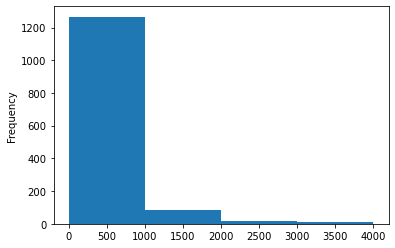

In [40]:
bins=[0,1000,2000,3000,4000]
df_input_full.n_reviews_max.plot(kind="hist", bins=bins, xlabel=bins)